<a href="https://colab.research.google.com/github/varnitvishwakarma/DEEP_LEARNING/blob/main/8_Regression_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving a Regression Problem using ANN:

In [2]:
from google.colab import drive

In [3]:
import os

In [4]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [5]:
os.getcwd()

'/content'

In [17]:
os.chdir('/content/drive/MyDrive/deep learning/regression/')

In [18]:
os.getcwd()

'/content/drive/MyDrive/deep learning/regression'

In [19]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [21]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [22]:
X = pd.DataFrame(housing.data, columns= housing.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [23]:
y = pd.DataFrame(housing.target, columns=['target'])
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [24]:
X.shape

(20640, 8)

In [25]:
y.shape

(20640, 1)

In [27]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full, random_state=42)

In [28]:
print(X_train_full.shape)
print(X_test.shape)
print(X_train.shape)
print(X_valid.shape)

(15480, 8)
(5160, 8)
(11610, 8)
(3870, 8)


In [29]:
X_train.shape[1:]

(8,)

# Architecture used:

<img src="https://github.com/entbappy/Branching-tutorial/blob/master/10.png?raw=true" width="500"
     height="300">

In [30]:
LAYERS = [
         tf.keras.layers.Dense(30, activation="relu", input_shape = X_train.shape[1:]),
         tf.keras.layers.Dense(10, activation="relu"),
         tf.keras.layers.Dense(5, activation='relu'),
         tf.keras.layers.Dense(1)

]

In [31]:
model = tf.keras.models.Sequential(LAYERS)

In [32]:

LOSS = "mse"
OPTIMIZER = "sgd"

model.compile(optimizer= OPTIMIZER, loss= LOSS)

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [35]:
EPOCHS = 20

history = model.fit( X_train, y_train, epochs= EPOCHS, validation_data=(X_valid, y_valid))


Epoch 1/20
363/363 [==============================] - 4s 4ms/step - loss: 0.8457 - val_loss: 0.5709
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4666 - val_loss: 0.4223
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3995 - val_loss: 0.4038
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3799 - val_loss: 0.3998
Epoch 5/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3718 - val_loss: 0.3615
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3621 - val_loss: 0.3821
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3573 - val_loss: 0.3584
Epoch 8/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3522 - val_loss: 0.3460
Epoch 9/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3493 - val_loss: 0.4297
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3458 - val_loss: 0.3398

In [36]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.845706,0.570908
1,0.466570,0.422324
2,0.399476,0.403823
3,0.379859,0.399778
4,0.371844,0.361469
5,0.362096,0.382104
6,0.357271,0.358409
7,0.352209,0.345981
8,0.349281,0.429704
9,0.345801,0.339752


<Axes: >

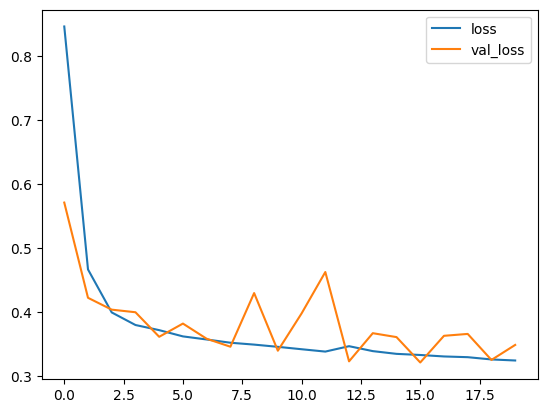

In [39]:
pd.DataFrame(history.history).plot()

In [38]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.3272


0.32724663615226746

In [40]:
X_test.shape

(5160, 8)

In [41]:
new = X_test[0]

In [42]:
new

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735,  0.19374821,  0.2870474 ])

In [43]:
new.shape

(8,)

In [44]:
X_test[0]

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735,  0.19374821,  0.2870474 ])

In [45]:
new.reshape((1,8))

array([[-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
         0.38899735,  0.19374821,  0.2870474 ]])

In [46]:
model.predict(new.reshape((1,8)))

1/1 [==============================] - 0s 110ms/step


array([[0.80706704]], dtype=float32)

# Model with callback

In [47]:
model_2 = tf.keras.models.Sequential(LAYERS)

LOSS = "mse"
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=1e-3)

model_2.compile(loss=LOSS , optimizer=OPTIMIZER)

EPOCHS = 20

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir="logs")

CALLBACKS = [checkpoint_cb, early_stopping_cb, tensorboard_cb]


history = model_2.fit(X_train, y_train, epochs = EPOCHS, validation_data=(X_valid, y_valid), callbacks = CALLBACKS)

Epoch 1/20
363/363 [==============================] - 3s 6ms/step - loss: 0.3157 - val_loss: 0.3375
Epoch 2/20
 23/363 [>.............................] - ETA: 1s - loss: 0.3352

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 2s 5ms/step - loss: 0.3145 - val_loss: 0.3372
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3142 - val_loss: 0.3368
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3138 - val_loss: 0.3408
Epoch 5/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3137 - val_loss: 0.3344
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3132 - val_loss: 0.3378
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3133 - val_loss: 0.3330
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3127 - val_loss: 0.3335
Epoch 9/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3125 - val_loss: 0.3316
Epoch 10/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3125 - val_loss: 0.3317
Epoch 11/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3120 - val_loss: 0.3288
Epoch 12/

In [48]:
%load_ext tensorboard

In [50]:
%tensorboard --logdir="logs"

Reusing TensorBoard on port 6006 (pid 7597), started 0:01:02 ago. (Use '!kill 7597' to kill it.)

<IPython.core.display.Javascript object>

In [51]:
!kill 7597

In [52]:
%tensorboard --logdir="logs"

<IPython.core.display.Javascript object>